In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

In [2]:
monomers_df = pd.read_csv('Monomers_properties.csv')
monomers_df.head()

,Unnamed: 0,Monomer,Singlet HOMO,Singlet LUMO,Singlet Gap,Triplet Energy,E_TS,Relative HOMO,Relative LUMO
0,1029,0,-10.189113,0.554595,10.743708,-33360.874374,4.133663,-1.227805,-1.180920
1,487,1,-7.509063,2.387636,9.896699,-18855.422203,3.900683,1.452244,0.652121
2,987,2,-8.514660,0.618596,9.133256,-12895.521133,3.338360,0.446648,-1.116919
3,1110,3,-7.168050,-0.213881,6.954169,-24491.660024,1.760261,1.793257,-1.949396
4,857,4,-8.350194,0.761728,9.111923,-12503.350498,3.246516,0.611113,-0.973787


# Figure S9 - Correlation between the monomers HOMO-LUMO gap and $\Delta E_{T-S}$

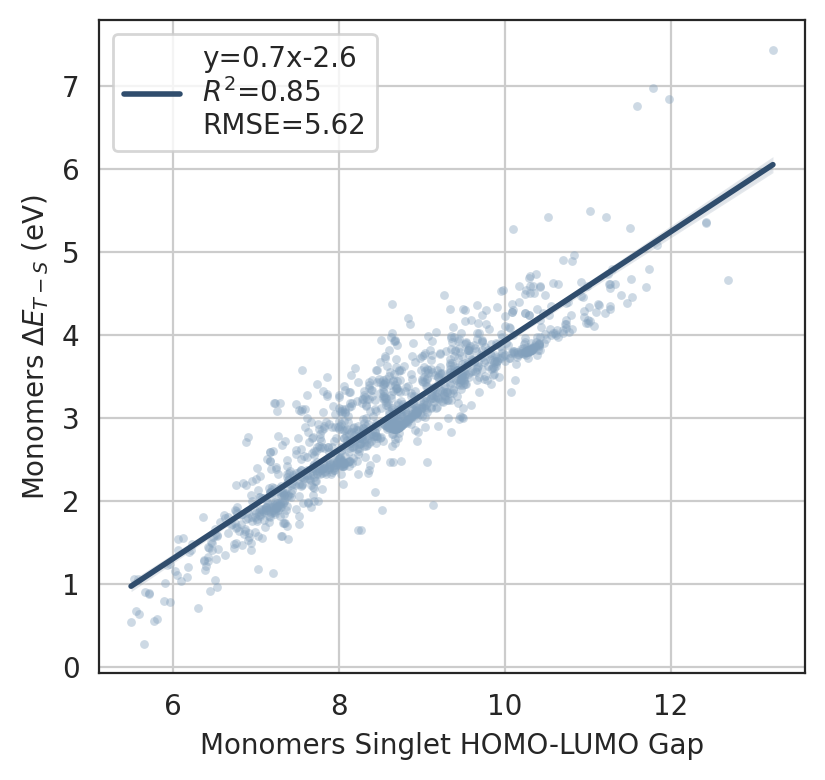

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style('white')
ax.set_aspect('equal')
ax.grid()

slope, intercept, r_value, p_value, std_err = stats.linregress(monomers_df['Singlet Gap'],monomers_df['E_TS'])
rmse = mean_squared_error(monomers_df['Singlet Gap'],monomers_df['E_TS'], squared=False)

sns.regplot(data = monomers_df, x = 'Singlet Gap', y='E_TS', ax = ax,
            scatter_kws={'alpha': 0.4, 'lw': 0, 's':10}, marker = 'o',
            color = '#82A0BC', 
            line_kws={'lw':'2', 'color': '#304D6D', 'label':"y={0:.1f}x{1:.1f}\n$R^2$={2:.2f}\nRMSE={3:.2f}".format(slope,intercept,r_value**2,rmse)}
            )

ax.legend()
ax.set_ylabel(r'Monomers $\Delta E_{T-S}$ (eV)')
ax.set_xlabel('Monomers Singlet HOMO-LUMO Gap')

plt.tight_layout()
plt.savefig('../figures/monomers_gap_triplet_corr.png')
plt.show()

# Figures S7 - Distribution of monomers' Reltive HOMO, Reltive LUMO, HOMO-LUMO gap, and $\Delta E_{T-S}$

In [9]:
# Getting thiophene's values
thiophene_num = 507
thiophene_homo = monomers_df[monomers_df['Monomer'] == thiophene_num]['Singlet HOMO'].item()
thiophene_lumo = monomers_df[monomers_df['Monomer'] == thiophene_num]['Singlet LUMO'].item()
thiophene_gap = monomers_df[monomers_df['Monomer'] == thiophene_num]['Singlet Gap'].item()
thiophene_ets = monomers_df[monomers_df['Monomer'] == thiophene_num]['E_TS'].item()

/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """


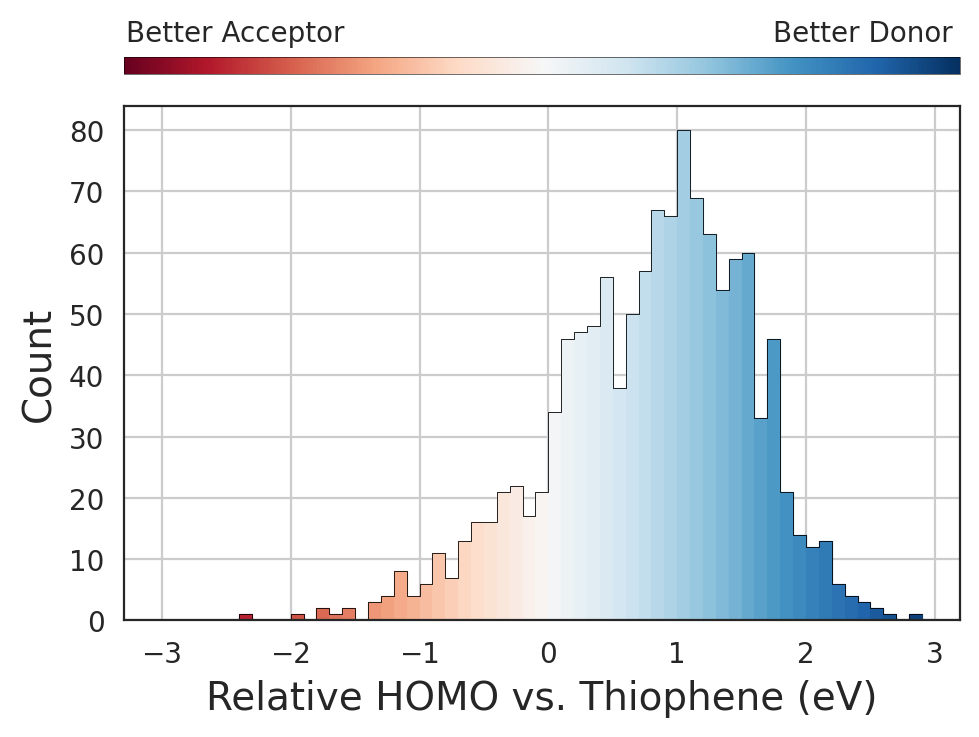

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'Relative HOMO', ax = ax, bins = np.arange(-3,3,0.1), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'Relative HOMO', ax = ax, bins = np.arange(-3,3,0.1))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", 60)

for p in hist.patches:
    x = int(p.get_x()*10 + 30)
    p.set_color(cmap[x])

ax.grid(which='major')
norm = plt.Normalize(-3 ,3)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [-2.2,2.3], aspect = 50)
cbar.ax.set_xticklabels(['Better Acceptor','Better Donor'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

ax.set_xlabel('Relative HOMO vs. Thiophene (eV)', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
plt.tight_layout()
plt.savefig('../figures/monomers_homo_histogram.png')
plt.show()

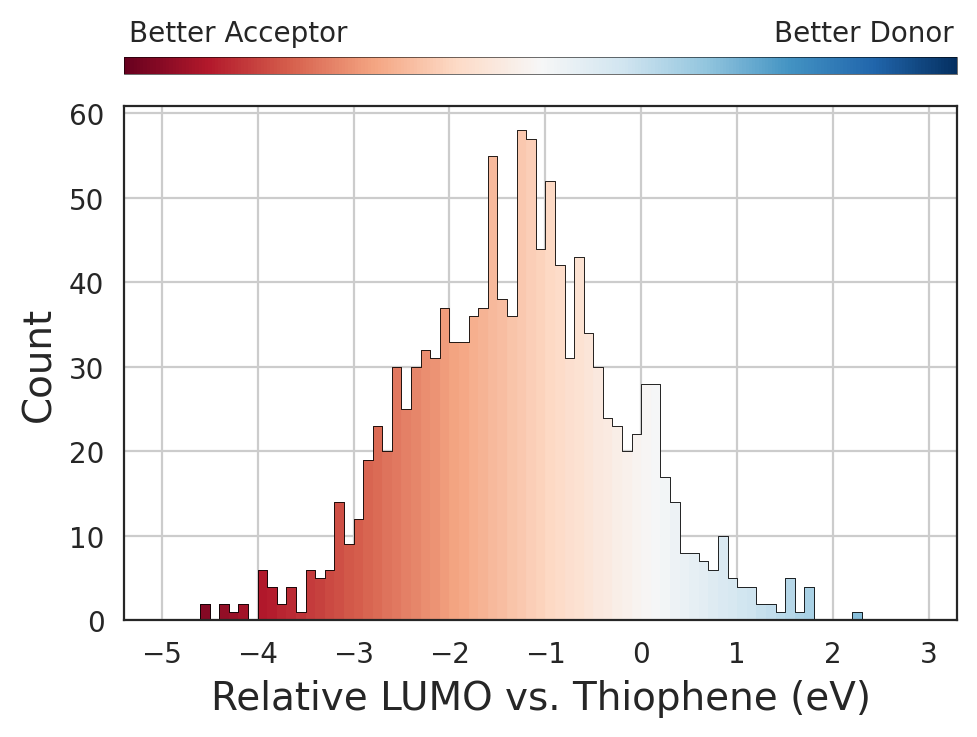

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'Relative LUMO', ax = ax, bins = np.arange(-5,3,0.1), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'Relative LUMO', ax = ax, bins = np.arange(-5,3,0.1))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", 100)

for p in hist.patches:
    x = int(p.get_x()*10 + 50)
    p.set_color(cmap[x])

ax.grid(which='major')

norm = plt.Normalize(-5 ,3)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [-3.9,2.1], aspect = 50)
cbar.ax.set_xticklabels(['Better Acceptor','Better Donor'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

ax.set_xlabel('Relative LUMO vs. Thiophene (eV)', fontsize=14)
ax.set_ylabel('Count', fontsize = 14)
plt.tight_layout()
plt.savefig('../figures/monomers_lumo_histogram.png')
plt.show()

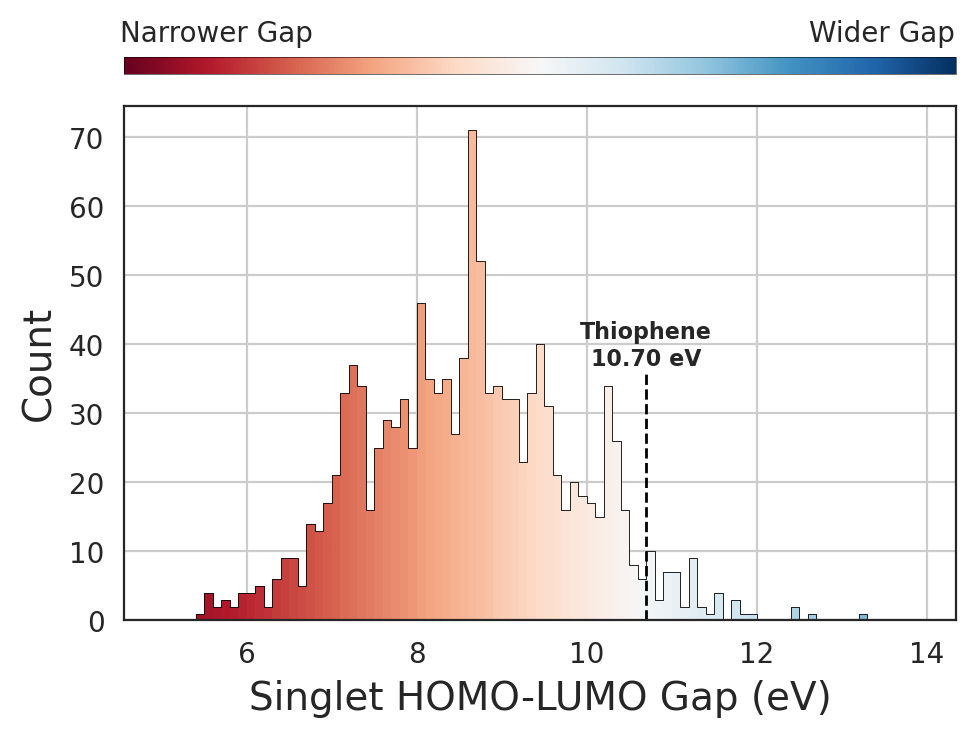

In [19]:
thiophene_prop = thiophene_gap
x = 'Singlet Gap'
xmin = np.floor(min(monomers_df[x]))
xmax = np.ceil(max(monomers_df[x]))
step = 0.1
step_rec = 1/step
range = abs(xmin - round(thiophene_prop)) * step_rec * 2 if abs(xmin - round(thiophene_prop)) > abs(xmax - round(thiophene_prop)) else abs(xmax - round(thiophene_prop)) * step_rec * 2

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'Singlet Gap', ax = ax, bins = np.arange(xmin, xmax, step), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'Singlet Gap', ax = ax, bins = np.arange(xmin, xmax, step))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", int(range))

for p in hist.patches:
    x = int(p.get_x()*10 - 45)
    p.set_color(cmap[x])

ax.grid(which='major')

plt.axvline(x=thiophene_gap, ymax= 0.48, linewidth=1, color='k', linestyle='--')
ax.annotate(f'Thiophene\n{thiophene_gap:.2f} eV', xy=(thiophene_gap, 37), fontsize = 8, ha='center', weight='bold')

norm = plt.Normalize(-6 ,3)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [-5,2.2], aspect = 50)
cbar.ax.set_xticklabels(['Narrower Gap','Wider Gap'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

ax.set_xlabel('Singlet HOMO-LUMO Gap (eV)', fontsize=14)
ax.set_ylabel('Count', fontsize= 14)
plt.tight_layout()
plt.savefig('../figures/monomers_abs_gap_histogram.png')
plt.show()

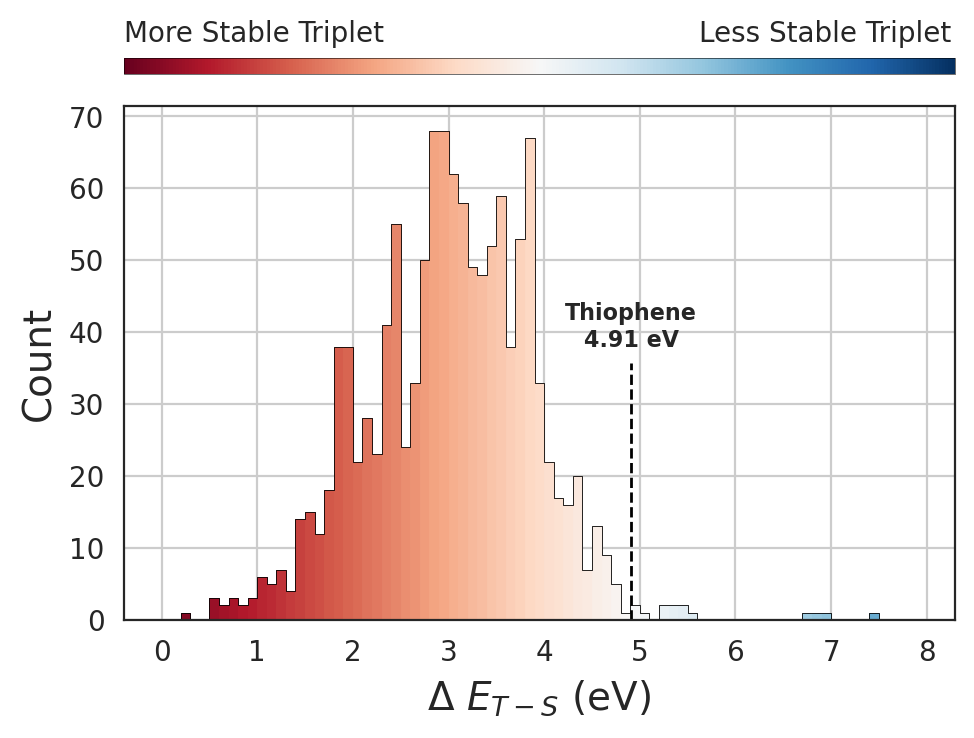

In [20]:
thiophene_prop = thiophene_ets
x = 'E_TS'
xmin = np.floor(min(monomers_df[x]))
xmax = np.ceil(max(monomers_df[x]))
step = 0.1
strp_rec = 1/step
range = abs(xmin - round(thiophene_prop)) * strp_rec * 2 if abs(xmin - round(thiophene_prop)) > abs(xmax - round(thiophene_prop)) else abs(xmax - round(thiophene_prop)) * strp_rec * 2

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'E_TS', ax = ax, bins = np.arange(xmin, xmax, step), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'E_TS', ax = ax, bins = np.arange(xmin, xmax, step))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", range)

for p in hist.patches:
    x = int(p.get_x()*10 + 1)
    p.set_color(cmap[x])

norm = plt.Normalize(0 ,8)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [1.25,6.75], aspect = 50)
cbar.ax.set_xticklabels(['More Stable Triplet','Less Stable Triplet'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

plt.axvline(x=thiophene_prop, ymax= 0.5, linewidth=1, color='k', linestyle='--')
ax.annotate(f'Thiophene\n{thiophene_prop:.2f} eV', xy=(thiophene_prop, 38), fontsize = 8, ha='center', weight='bold')

ax.grid()
ax.set_xlabel(r'$\Delta~E_{T-S}$ (eV)', fontsize = 14)
ax.set_ylabel('Count', fontsize= 14)
plt.tight_layout()
plt.savefig('../figures/monomers_stable_triplet.png')
plt.show()

# Figures S8 - Distribution of monomers' Reltive HOMO, Reltive LUMO, HOMO-LUMO gap, and $\Delta E_{T-S}$ with CAM-B3LYP

In [21]:
monomers_df = pd.read_csv('Monomers_properties_cam-b3lyp.csv')
monomers_df.head()

,Unnamed: 0,Monomer,Singlet HOMO,Singlet LUMO,Singlet Gap,Triplet Energy,E_TS,Relative HOMO,Relative LUMO
0,1029,0,-9.298865,-0.202317,9.096548,-33359.207485,4.868652,-1.224077,-1.169981
1,487,1,-6.711226,1.586805,8.298030,-18850.936114,3.834583,1.363563,0.619141
2,987,2,-7.692740,-0.135322,7.557418,-12892.301730,3.259967,0.382048,-1.102986
3,1110,3,-6.381478,-0.909813,5.471665,-24487.632259,1.697826,1.693310,-1.877477
4,857,4,-7.543731,-0.063457,7.480274,-12500.718064,3.158469,0.531057,-1.031121


In [22]:
# Getting thiophene's values
thiophene_num = 507
thiophene_homo = monomers_df[monomers_df['Monomer'] == thiophene_num]['Singlet HOMO'].item()
thiophene_lumo = monomers_df[monomers_df['Monomer'] == thiophene_num]['Singlet LUMO'].item()
thiophene_gap = monomers_df[monomers_df['Monomer'] == thiophene_num]['Singlet Gap'].item()
thiophene_ets = monomers_df[monomers_df['Monomer'] == thiophene_num]['E_TS'].item()

/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/home/shualdon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  


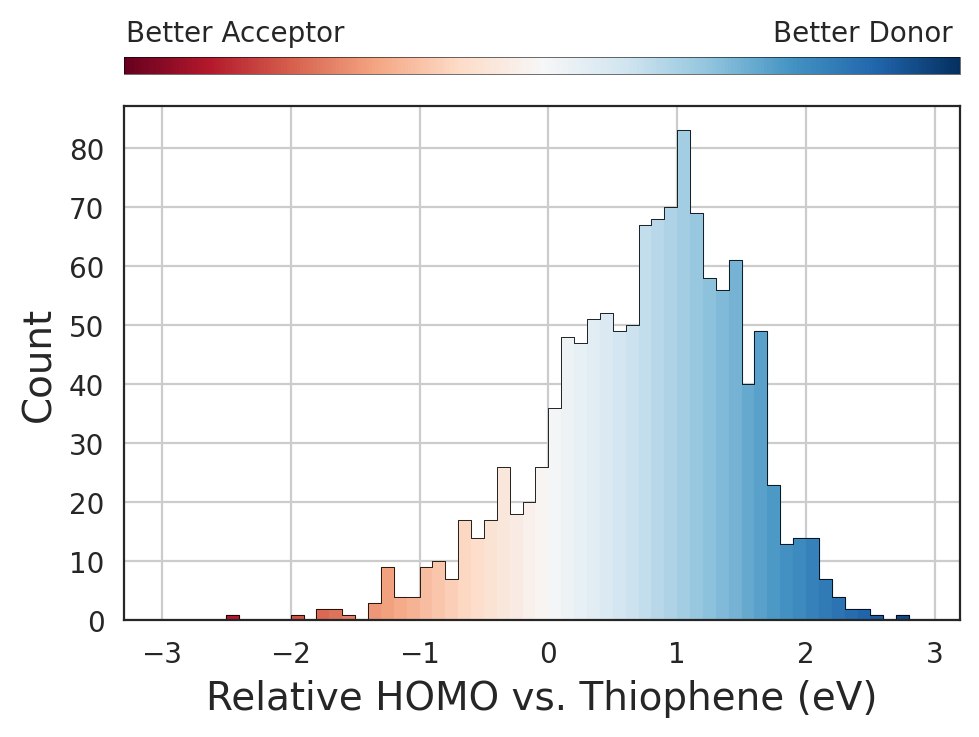

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'Relative HOMO', ax = ax, bins = np.arange(-3,3,0.1), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'Relative HOMO', ax = ax, bins = np.arange(-3,3,0.1))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", 60)

for p in hist.patches:
    x = int(p.get_x()*10 + 30)
    p.set_color(cmap[x])

ax.grid(which='major')
norm = plt.Normalize(-3 ,3)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [-2.2,2.3], aspect = 50)
cbar.ax.set_xticklabels(['Better Acceptor','Better Donor'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

ax.set_xlabel('Relative HOMO vs. Thiophene (eV)', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
plt.tight_layout()
plt.savefig('../figures/monomers_homo_histogram_b3lyp.png')
plt.show()

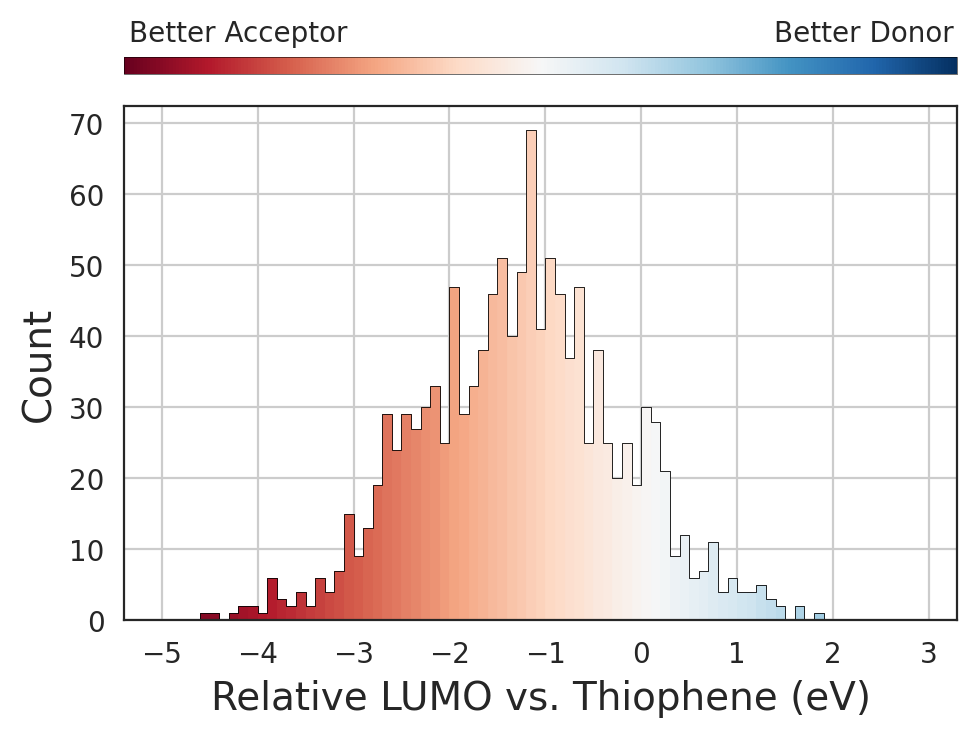

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'Relative LUMO', ax = ax, bins = np.arange(-5,3,0.1), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'Relative LUMO', ax = ax, bins = np.arange(-5,3,0.1))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", 100)

for p in hist.patches:
    x = int(p.get_x()*10 + 50)
    p.set_color(cmap[x])

ax.grid(which='major')

norm = plt.Normalize(-5 ,3)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [-3.9,2.1], aspect = 50)
cbar.ax.set_xticklabels(['Better Acceptor','Better Donor'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

ax.set_xlabel('Relative LUMO vs. Thiophene (eV)', fontsize=14)
ax.set_ylabel('Count', fontsize = 14)
plt.tight_layout()
plt.savefig('../figures/monomers_lumo_histogram_b3lyp.png')
plt.show()

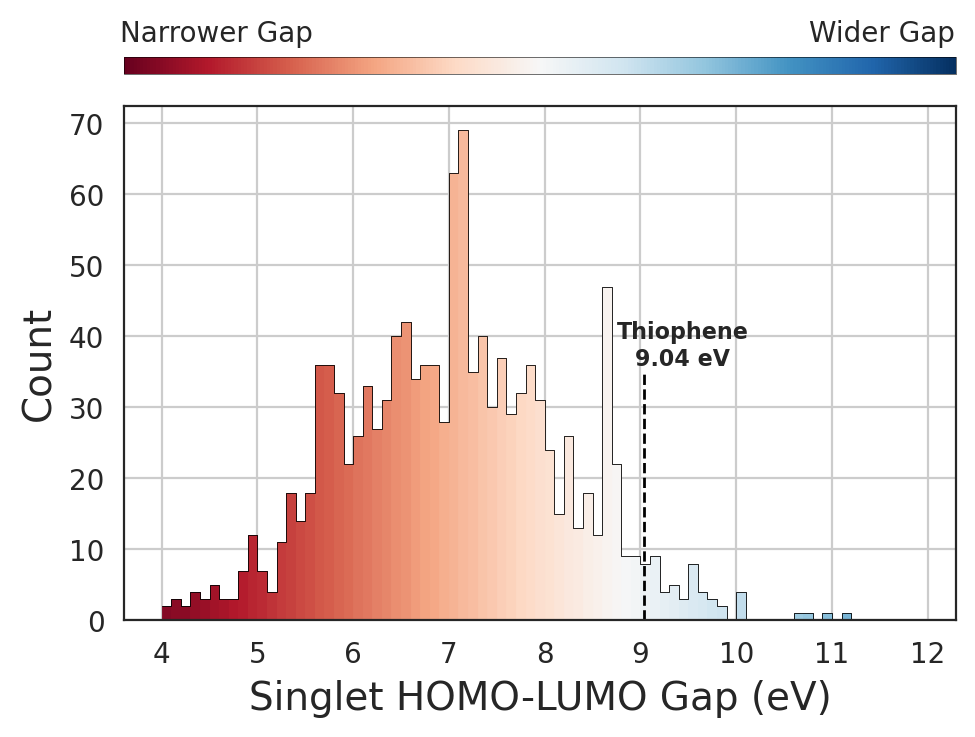

In [35]:
thiophene_prop = thiophene_gap
x = 'Singlet Gap'
xmin = np.floor(min(monomers_df[x]))
xmax = np.ceil(max(monomers_df[x]))
step = 0.1
step_rec = 1/step
range = abs(xmin - round(thiophene_prop)) * step_rec * 2 if abs(xmin - round(thiophene_prop)) > abs(xmax - round(thiophene_prop)) else abs(xmax - round(thiophene_prop)) * step_rec * 2

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'Singlet Gap', ax = ax, bins = np.arange(xmin, xmax, step), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'Singlet Gap', ax = ax, bins = np.arange(xmin, xmax, step))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", int(range))

for p in hist.patches:
    x = int(p.get_x()*10 - 37)
    p.set_color(cmap[x])

ax.grid(which='major')

plt.axvline(x=thiophene_gap, ymax= 0.48, linewidth=1, color='k', linestyle='--')
ax.annotate(f'Thiophene\n{thiophene_gap:.2f} eV', xy=(thiophene_gap+0.4, 36), fontsize = 8, ha='center', weight='bold')

norm = plt.Normalize(-6 ,3)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [-5,2.2], aspect = 50)
cbar.ax.set_xticklabels(['Narrower Gap','Wider Gap'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

ax.set_xlabel('Singlet HOMO-LUMO Gap (eV)', fontsize=14)
ax.set_ylabel('Count', fontsize= 14)
plt.tight_layout()
plt.savefig('../figures/monomers_abs_gap_histogram_b3lyp.png')
plt.show()

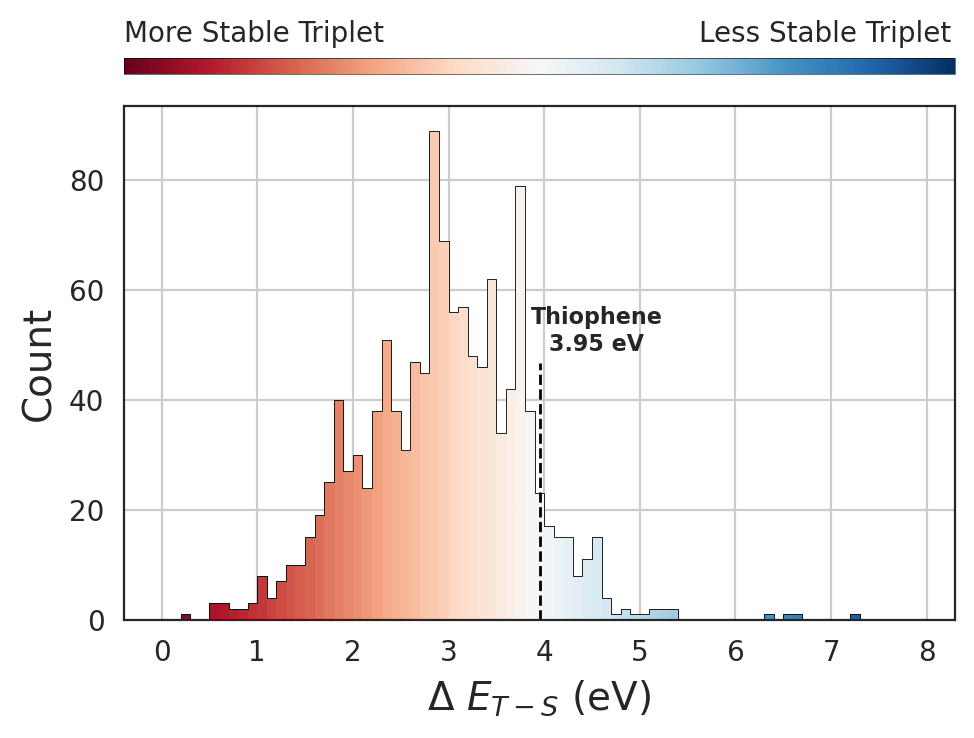

In [30]:
thiophene_prop = thiophene_ets
x = 'E_TS'
xmin = np.floor(min(monomers_df[x]))
xmax = np.ceil(max(monomers_df[x]))
step = 0.1
strp_rec = 1/step
range = abs(xmin - round(thiophene_prop)) * strp_rec * 2 if abs(xmin - round(thiophene_prop)) > abs(xmax - round(thiophene_prop)) else abs(xmax - round(thiophene_prop)) * strp_rec * 2

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
sns.set_style("white")
sns.histplot(data=monomers_df, x = 'E_TS', ax = ax, bins = np.arange(xmin, xmax, step), element = 'step', fill = False, linewidth=0.3, color = 'k')
hist = sns.histplot(data=monomers_df, x = 'E_TS', ax = ax, bins = np.arange(xmin, xmax, step))
#cmap = sns.color_palette("vlag", n_colors = 60)
cmap = sns.mpl_palette("RdBu", range)

for p in hist.patches:
    x = int(p.get_x()*10 + 1)
    p.set_color(cmap[x])

norm = plt.Normalize(0 ,8)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, location = 'top', ticks = [1.25,6.75], aspect = 50)
cbar.ax.set_xticklabels(['More Stable Triplet','Less Stable Triplet'])
cbar.ax.tick_params(size=0)
cbar.ax.spines['outline'].set(visible=True, lw=.2, edgecolor="black")

plt.axvline(x=thiophene_prop, ymax= 0.5, linewidth=1, color='k', linestyle='--')
ax.annotate(f'Thiophene\n{thiophene_prop:.2f} eV', xy=(thiophene_prop+0.6, 49), fontsize = 8, ha='center', weight='bold')

ax.grid()
ax.set_xlabel(r'$\Delta~E_{T-S}$ (eV)', fontsize = 14)
ax.set_ylabel('Count', fontsize= 14)
plt.tight_layout()
plt.savefig('../figures/monomers_stable_triplet_b3lyp.png')
plt.show()